<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="center"><font color='#DEB887'>Diwali Sales Data </font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Step 1: Importing the Required Libraries
</p>
</div>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Step 2: Loading the Data set
</p>
</div>

In [6]:
df= pd.read_csv('Diwali Sales Data.csv', encoding ='unicode_escape')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Step 3: Basic Understanding of Data
</p>
</div>

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Preview of data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


## How big is the data

In [9]:
df.shape

(11251, 15)

**observation**:
- This Dataset has 11251 rows and 15 columns 

In [10]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

**observation:**
from above output , all columns except the amount, status and unnamed1 has the accurate values, only these three columns has null values 
so we need to drop them first in order to get the accurate insight 

In [11]:
df.drop(['Status','unnamed1'], axis=1, inplace= True)

In [12]:
df.shape

(11251, 13)

In [13]:
df.dropna(inplace= True)

In [14]:
df.shape

(11239, 13)

## Fetching column names

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## Exploratory Data Analysis 

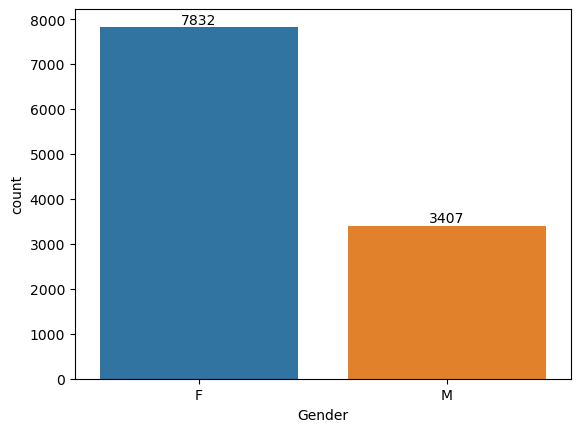

In [16]:
ax= sns.countplot(x='Gender', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

In [17]:
df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


<Axes: xlabel='Gender', ylabel='Amount'>

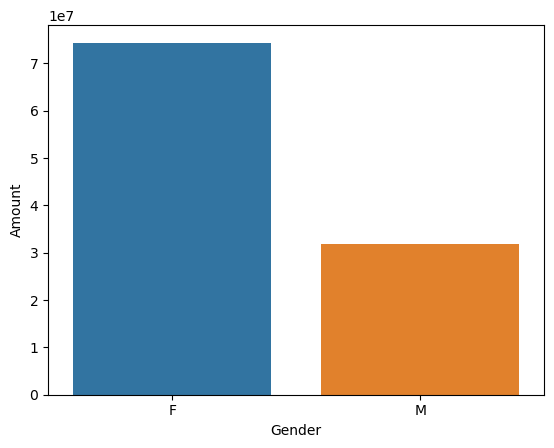

In [18]:
Sales = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.barplot(x='Gender',y='Amount',  data= Sales)

## From above graph we can see that most of the buyers are female and even the purchasing power of females are grater than men 

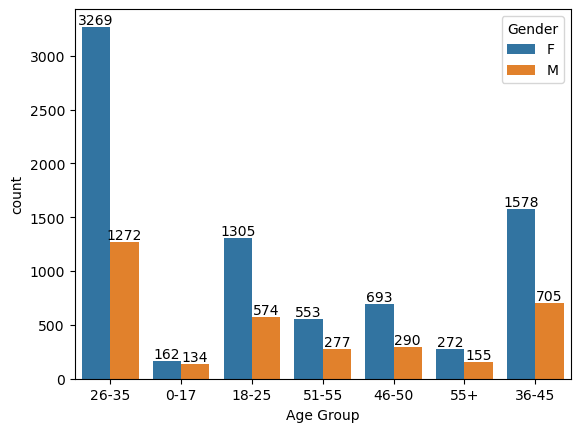

In [19]:
ax= sns.countplot(x='Age Group', data = df, hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

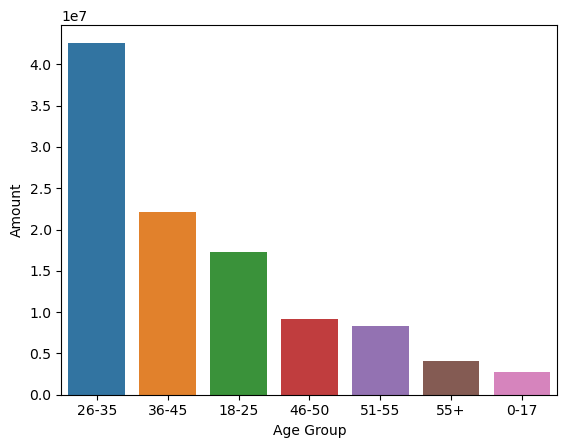

In [20]:
Sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.barplot(x='Age Group',y='Amount',  data= Sales_age)

## from the above graph we can see that most of the buyers are from 26-35 age group 

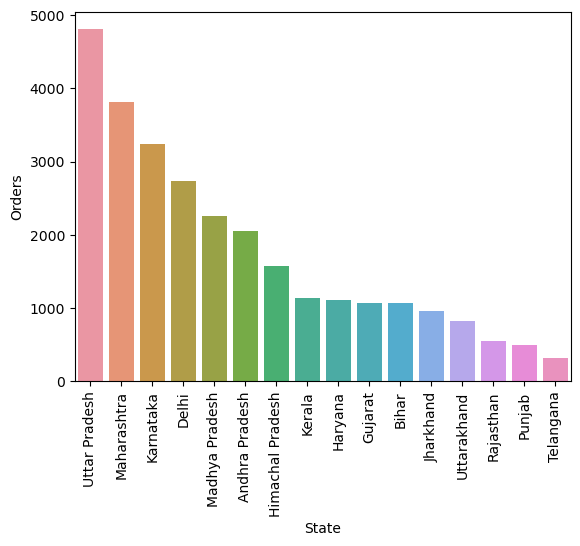

In [35]:
State_sales = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by='Orders', ascending = False)
sns.barplot(x='State',y='Orders',  data= State_sales)
plt.xticks(rotation=90)
plt.show()

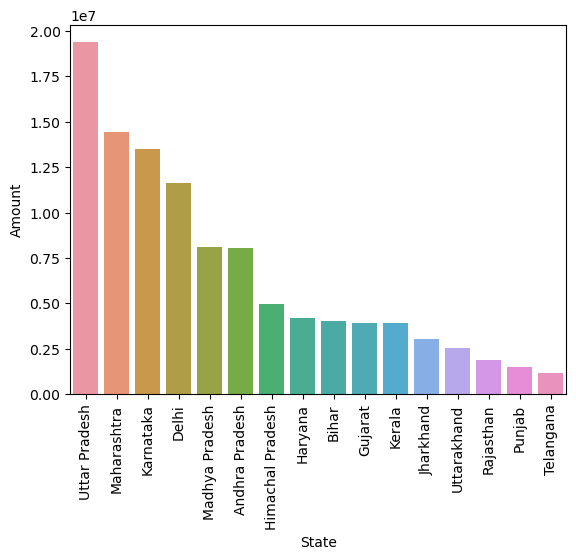

In [34]:
State_sales = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.barplot(x='State',y='Amount',  data= State_sales)
plt.xticks(rotation=90)
plt.show()

## form the above graphs we can see that most of the orders are from Uttar Pradesh, Maharashtra and karnataka respectively, amount according as well. 

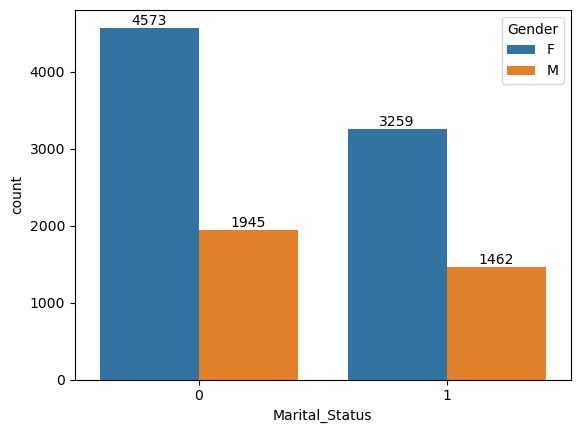

In [23]:
ax= sns.countplot(x='Marital_Status', data = df, hue= 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

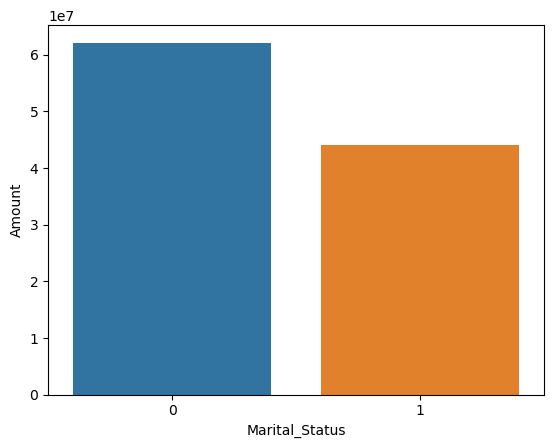

In [24]:
Status_sales = df.groupby(['Marital_Status'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.barplot(x='Marital_Status',y='Amount',  data= Status_sales)

## from above graph we can see that most of the buyers are married women and they have high purchasing power.

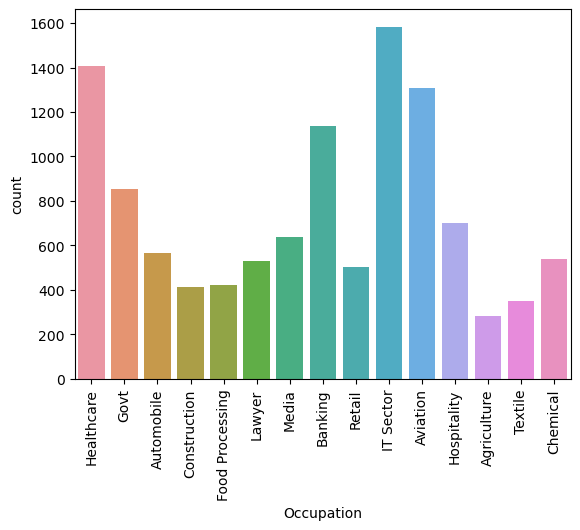

In [30]:
sns.countplot(x= 'Occupation', data = df)
plt.xticks(rotation =90)
plt.show()

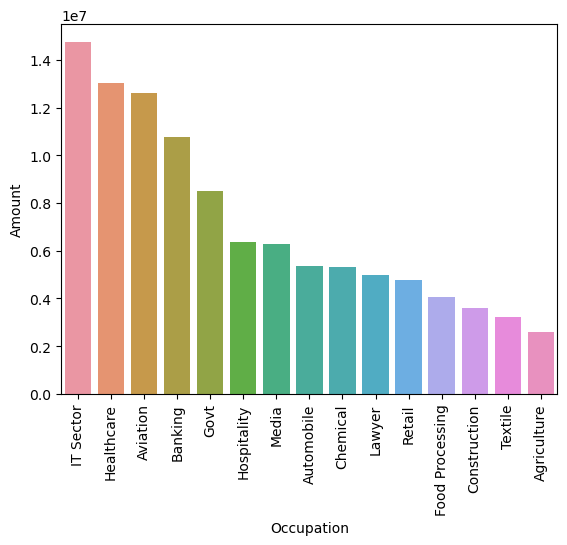

In [26]:
Occupation = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.barplot(x='Occupation',y='Amount',  data= Occupation)
plt.xticks(rotation=90)
plt.show()

## as we can see from above graph that people from IT sector has the higherst orders 

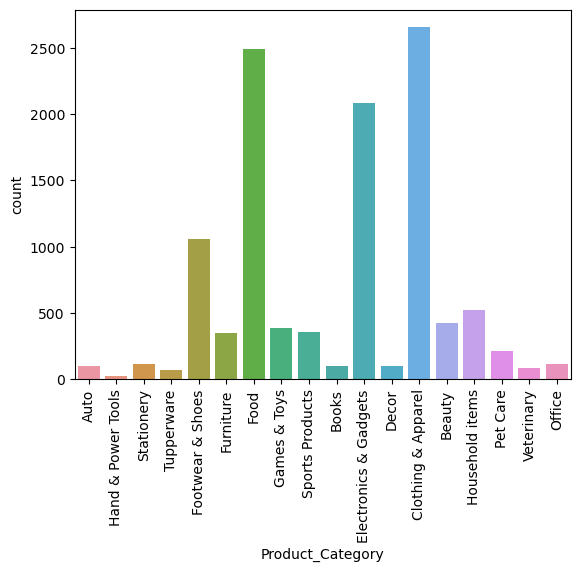

In [31]:
sns.countplot(x= 'Product_Category', data = df)
plt.xticks(rotation=90)
plt.show()

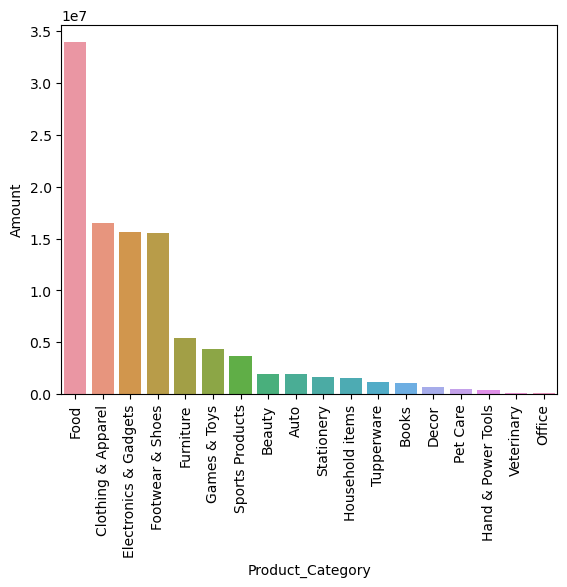

In [32]:
Product_Sales = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.barplot(x='Product_Category',y='Amount',  data= Product_Sales)
plt.xticks(rotation=90)
plt.show()

## from the above graph we can say that the Food has the highest orders 

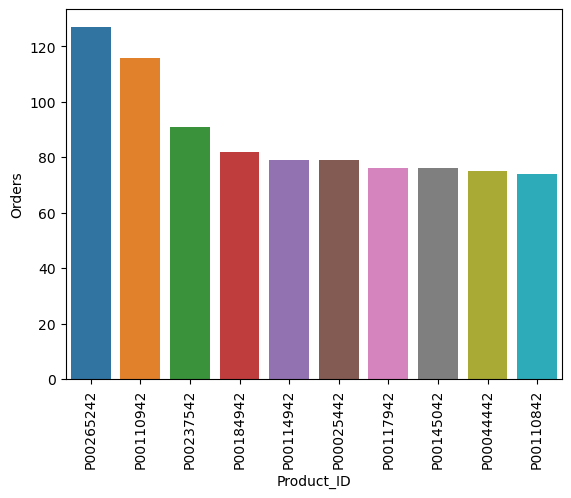

In [33]:
State_sales = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by='Orders', ascending = False).head(10)
sns.barplot(x='Product_ID',y='Orders',  data= State_sales)
plt.xticks(rotation=90)
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Conclusion
</p>
</div>

## Married women age group 26-35 years from UP, Maharashtra and Karnataka working in IT, Healthcare and aviation are more likely to buy product from food, clothing and Electronics category.